In [1]:
# imports
import prepare as p
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Exercise




> Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

## 1. For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. 
* *for both datasets you should choose a method of splitting your data and only explore the training split.*

In [2]:
df = p.prep_opsd()

In [3]:
df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [5]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [6]:
# returning date range of data
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 6)


### For consumption

In [7]:
train = df.loc[:'2015'] # includes 2016
validate = df.loc['2016']
test = df.loc['2017']

train.shape, validate.shape, test.shape

((3652, 6), (366, 6), (365, 6))

### For all other features

In [8]:
# train = df.loc['2012' : '2015']
# validate = df.loc['2016']
# test = df.loc['2017']

# train.shape, validate.shape, test.shape

## Plotting train data 

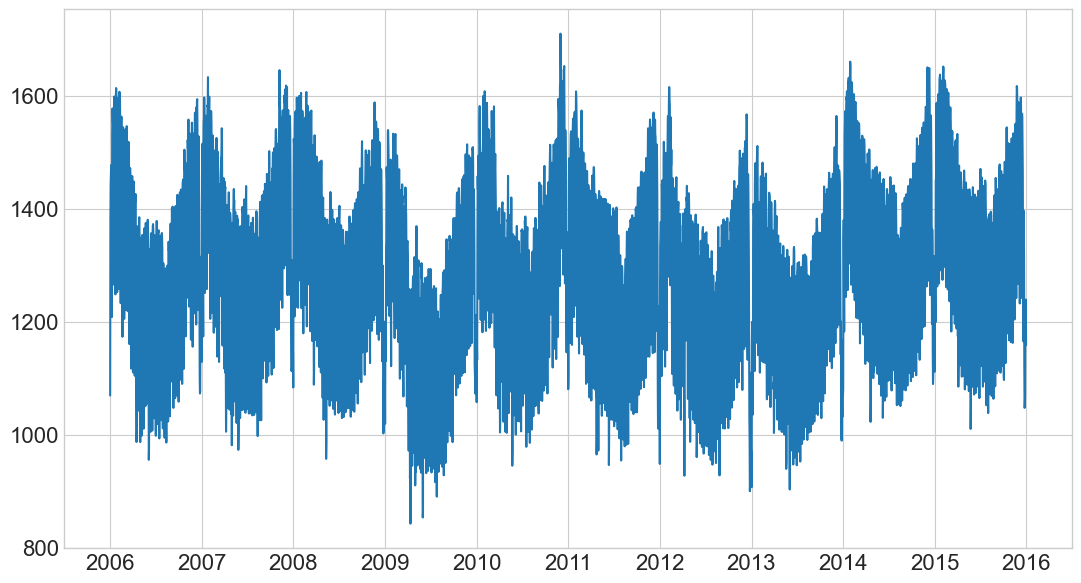

In [9]:
plt.plot(train.index,  train.consumption)
plt.show()

## Plotting validate data

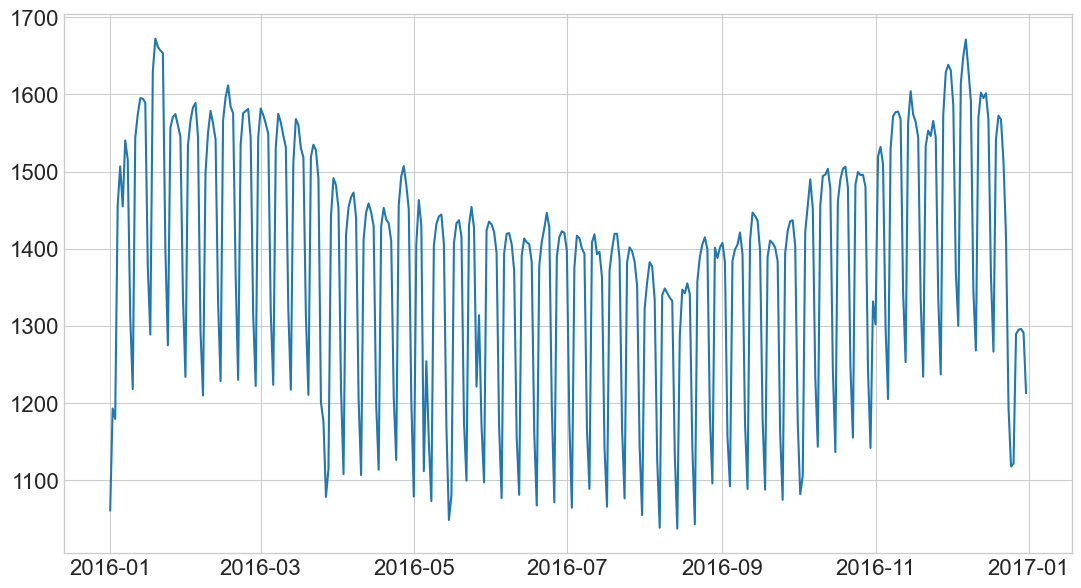

In [10]:
plt.plot(validate.index, validate.consumption)
plt.show()

## Plotting test data 

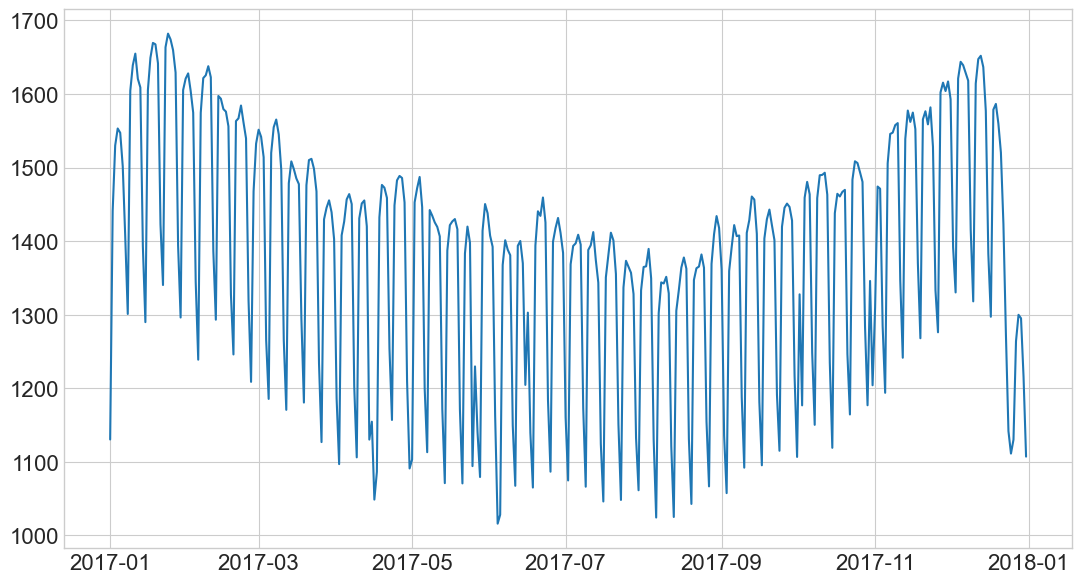

In [11]:
plt.plot(test.index, test.consumption)
plt.show()

In [12]:
y = train.consumption
y.head()

date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: consumption, dtype: float64

In [13]:
# y = train.solar
# y.head()

In [14]:
# y = train.wind
# y.head()

In [15]:
# y = train.wind_solar
# y.head()

# Ignore the time series for now

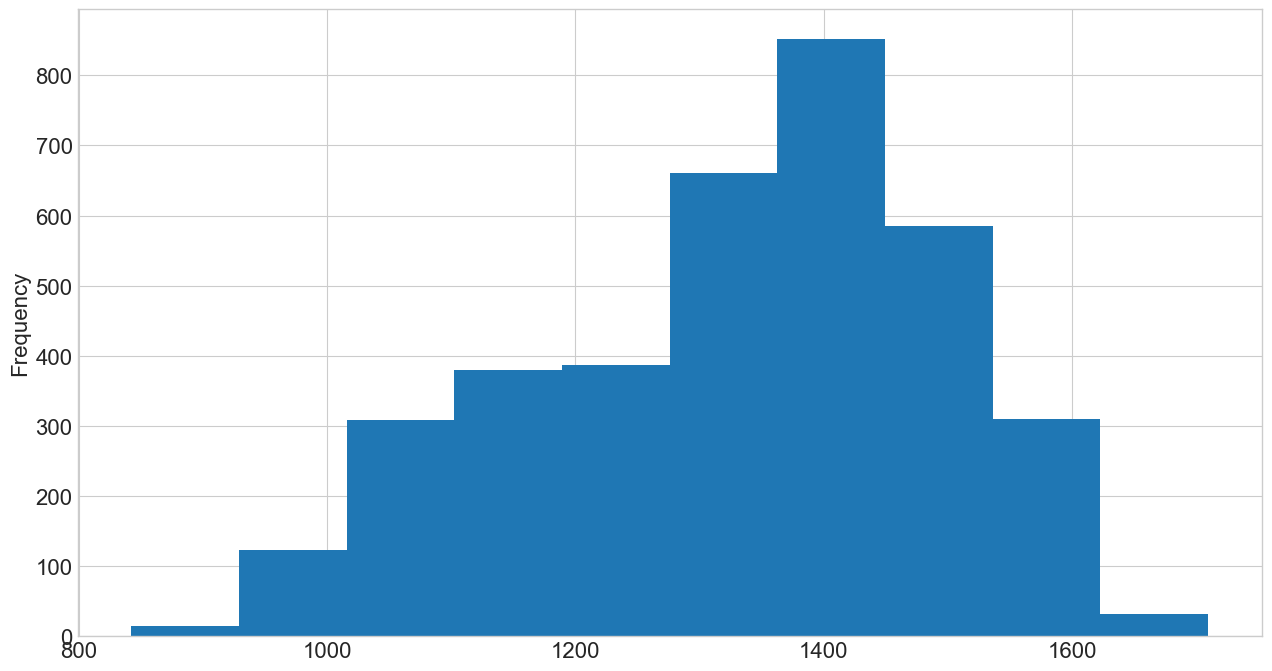

In [16]:
# data distribution
y.plot.hist()
plt.tight_layout()
plt.show()

# Here we can see average consumption by month, there is slightly less consumption from June to July

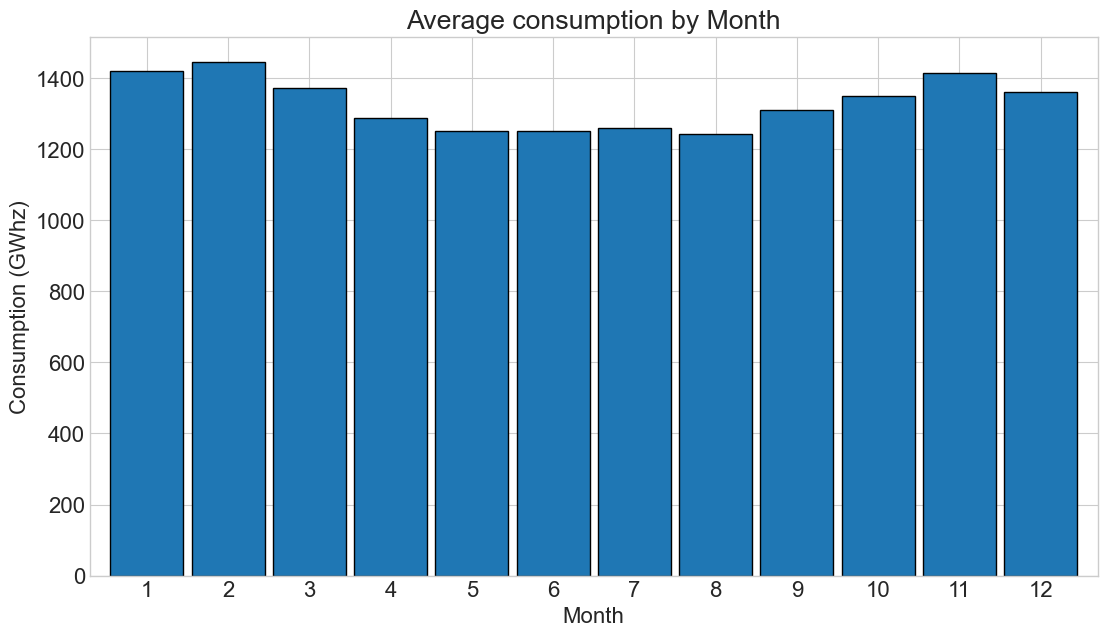

In [17]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average consumption by Month', xlabel='Month', ylabel='Consumption (GWhz)')
plt.show()

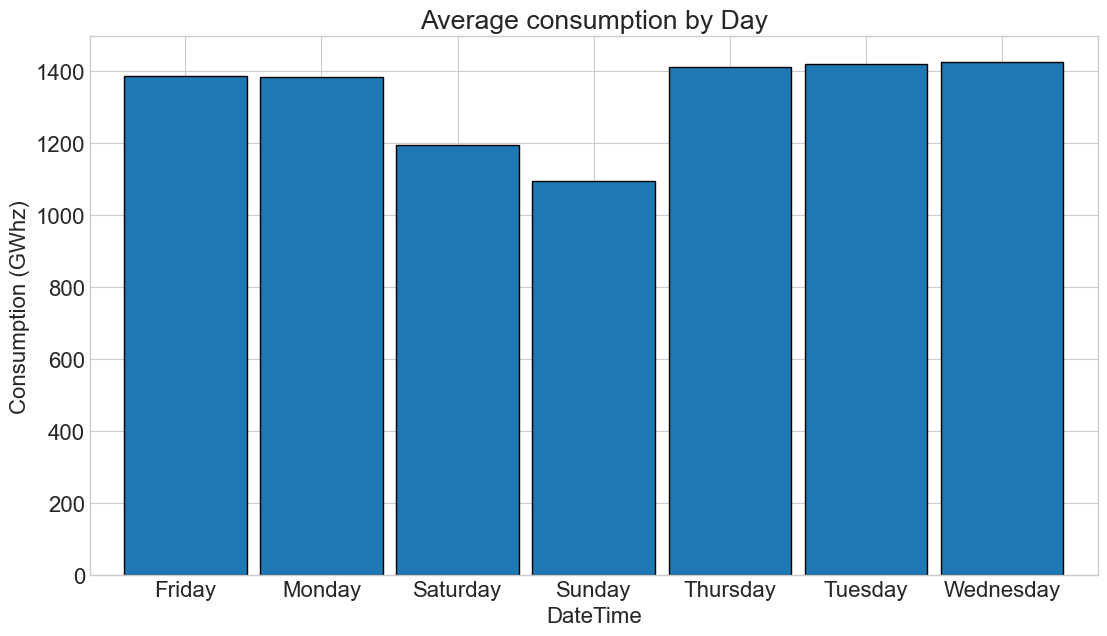

In [18]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average consumption by Day', xlabel='DateTime', ylabel='Consumption (GWhz)')
plt.show()

## Saturday and Sunday showed less consumption use

<Axes: xlabel='weekday', ylabel='consumption'>

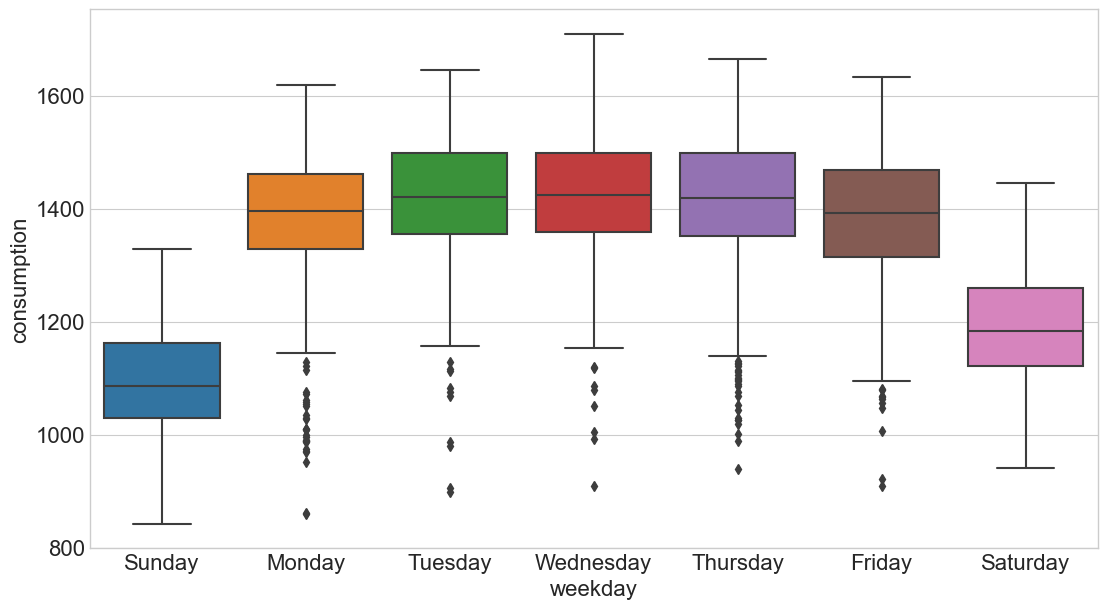

In [19]:
(
    y.reset_index()
    .assign(weekday=lambda df: y.index.day_name())
    .pipe((sns.boxplot, 'data'), y='consumption', x='weekday')
)

## Consumption on the weekend also reflects jere sunday being the lowest sitting at around 1100 GWhz

----------------------

> # Visualize the target over time

----------------------

## Is there a trend occuring over time in the train data?

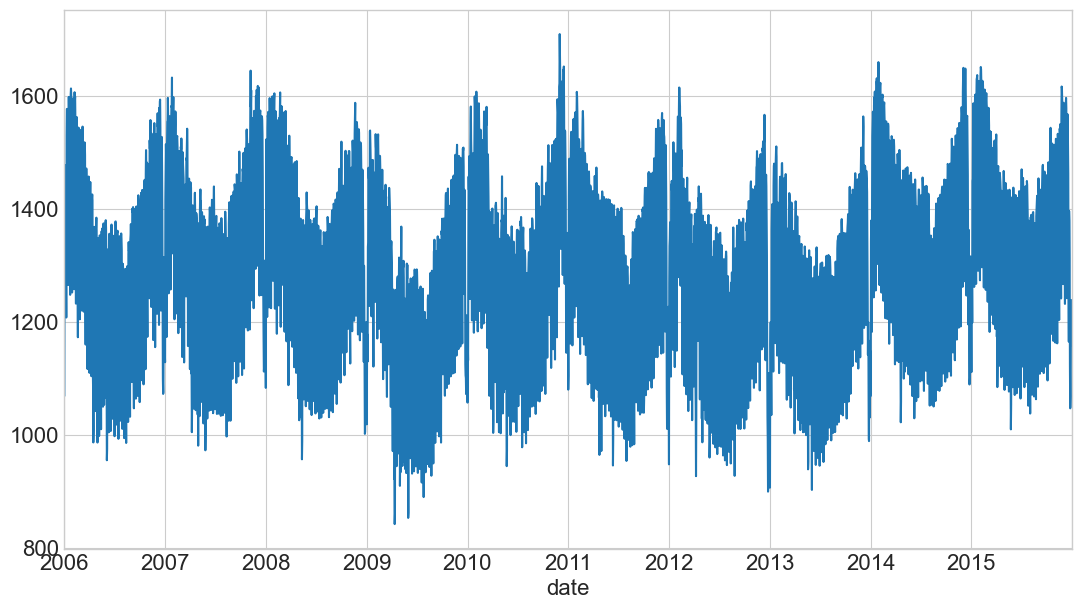

In [20]:
y.plot()
plt.show()

## Yes, there is a trend and over time. The consumption peaked between mid 2010 to 2011.

----------------------

## Is there a trend on average of comsumption bi-annually?

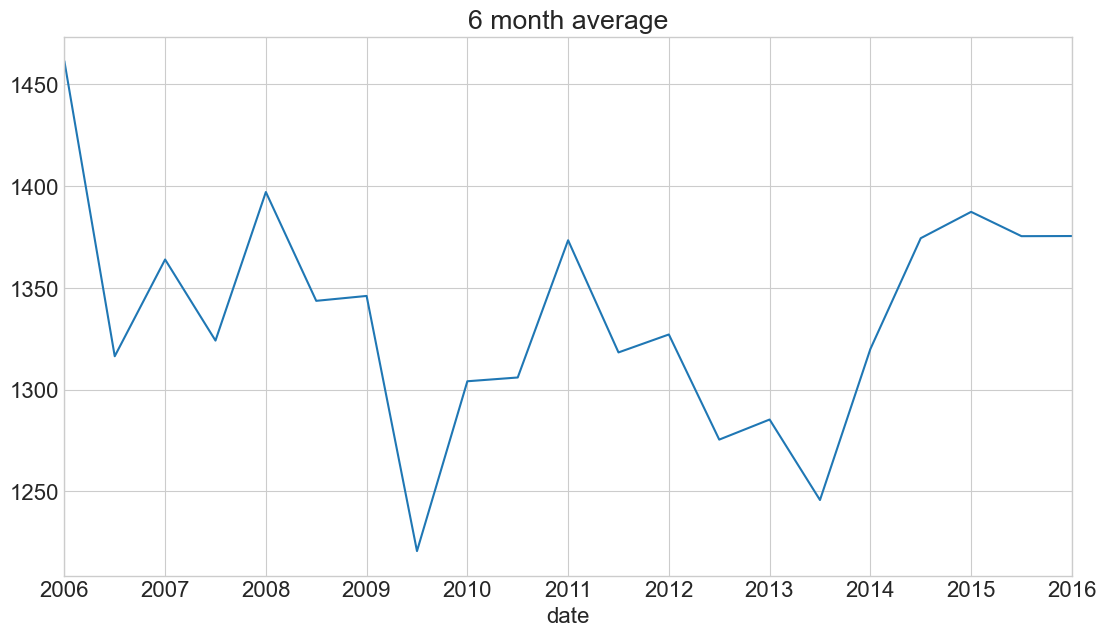

In [21]:
y.resample('6M').mean().plot(title='6 month average')
plt.show()

## Yes, there were ups and downs over the years and consumption was very high before 2006, in 2008, 2011, and 2015

----------------------

## data aggregation

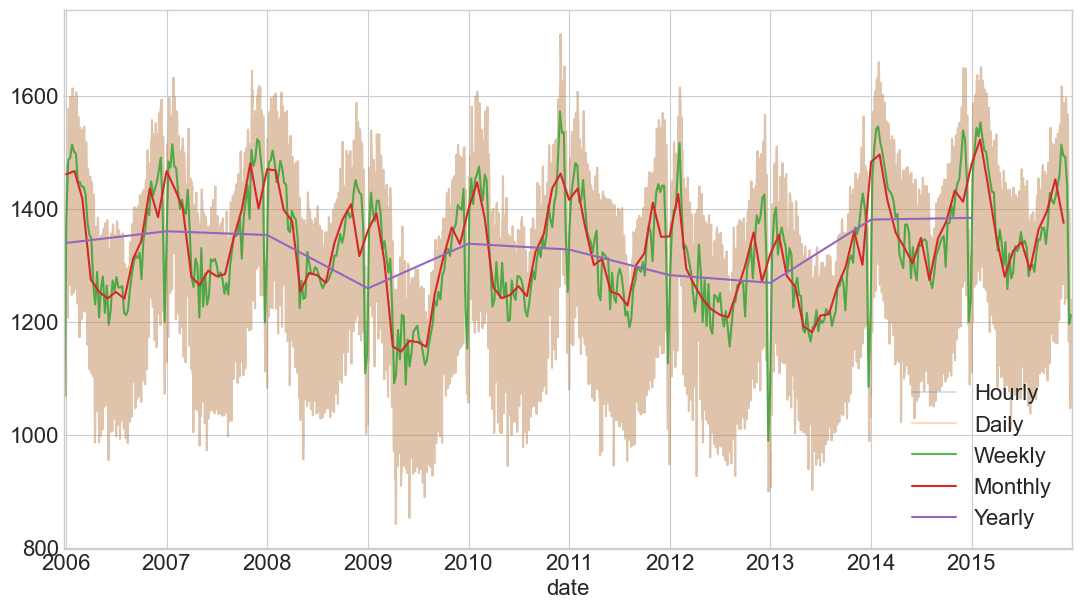

In [22]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.3, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

## moving averages 

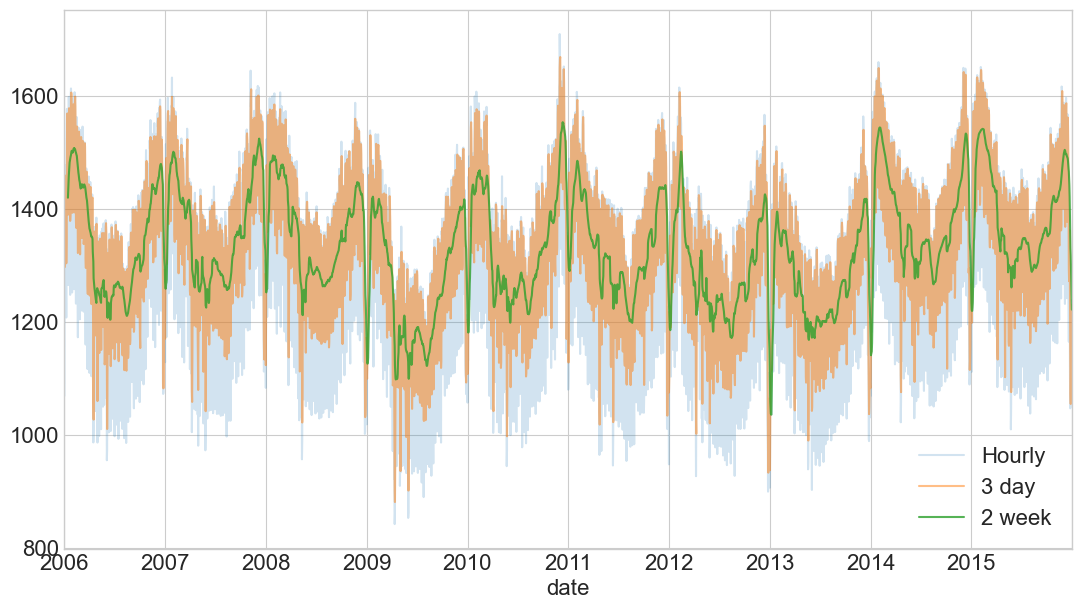

In [23]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(14).mean().plot(alpha=.8, label='2 week')
plt.legend()
plt.show()

____

## Visualize consumption change over time

____

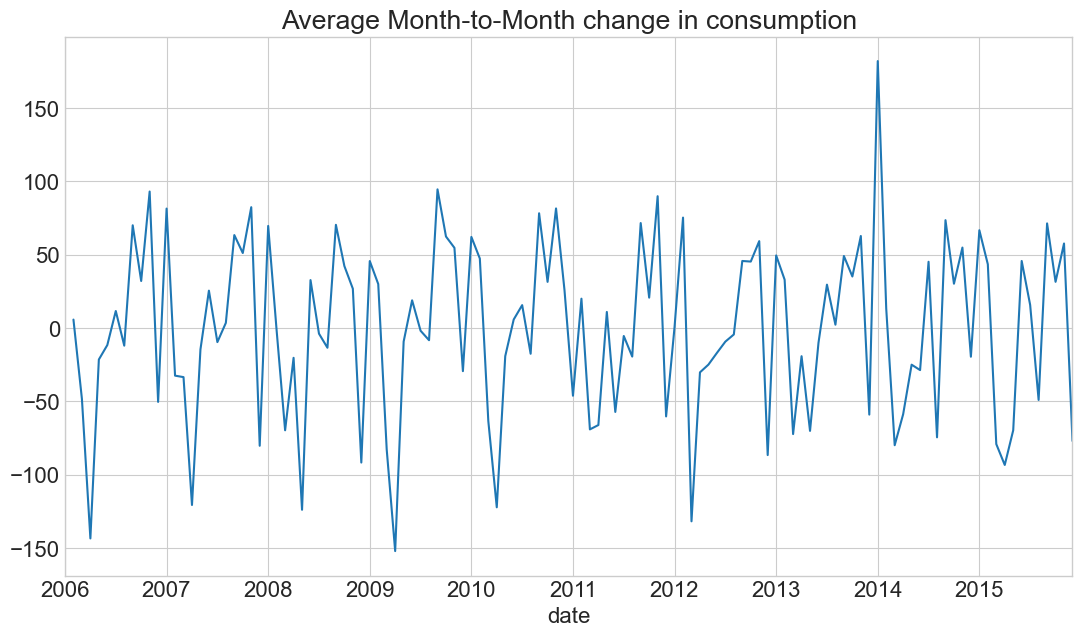

In [24]:
y.resample('M').mean().diff().plot(title='Average Month-to-Month change in consumption')
plt.show()

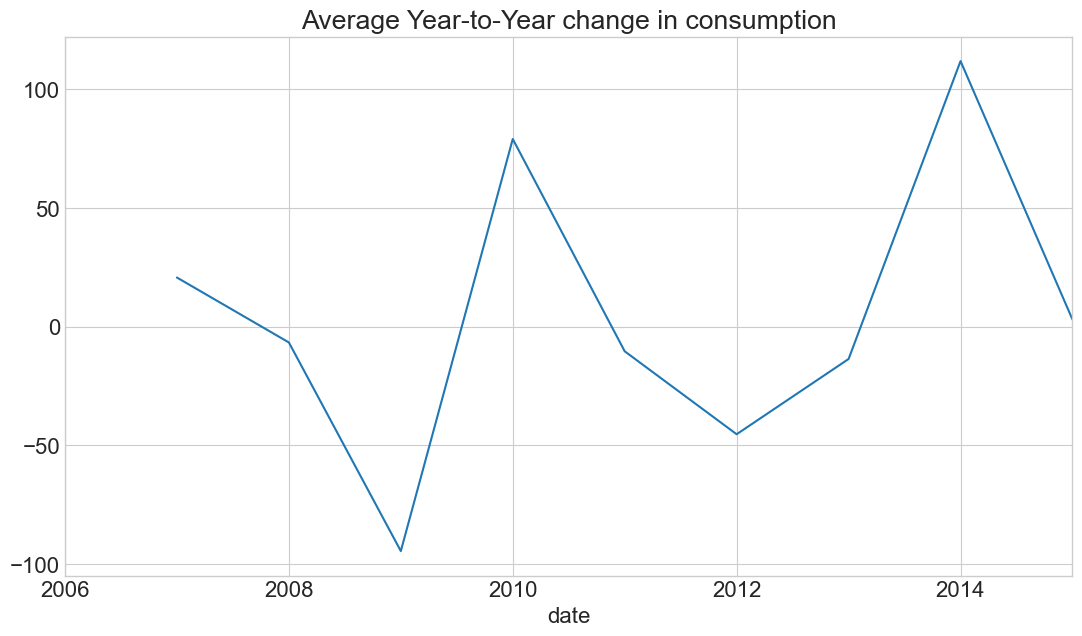

In [25]:
y.resample('Y').mean().diff().plot(title='Average Year-to-Year change in consumption')
plt.show()

----

## year over year differences

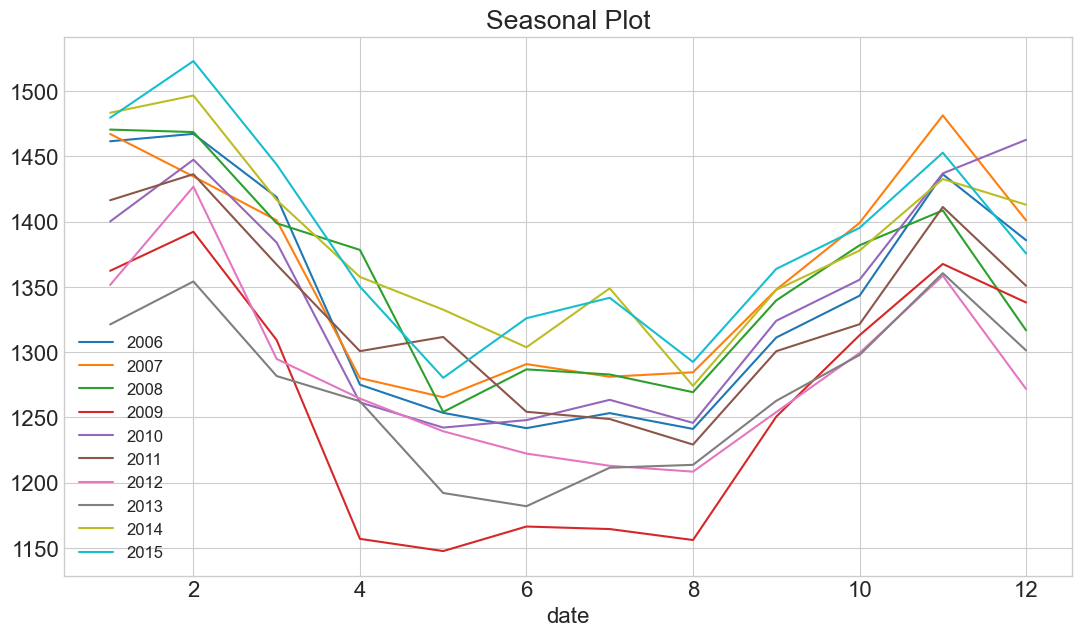

In [26]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend(loc='lower left', fontsize='12')
plt.show()

----

## Seasonal Subseries Plot

----

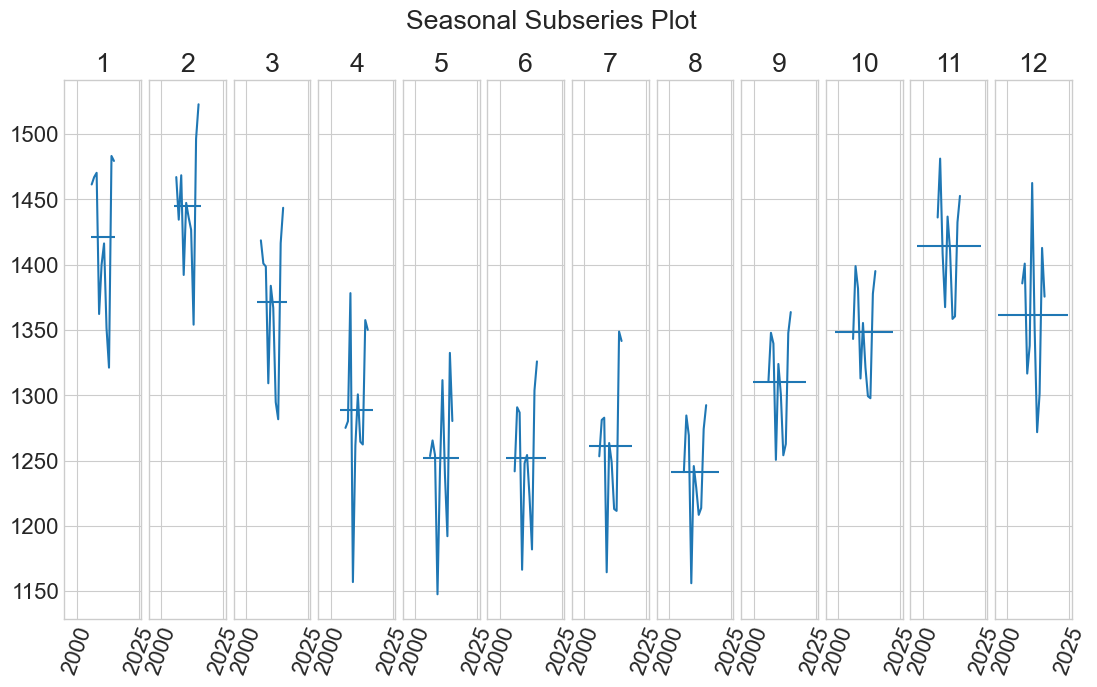

In [27]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack(0)

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iterrows()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.set_xticklabels([int(thing) for thing in ax.get_xticks()], rotation = 70)

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0.10)

----

## Lag plot of consumption

----

In [28]:
# exercise note -- example

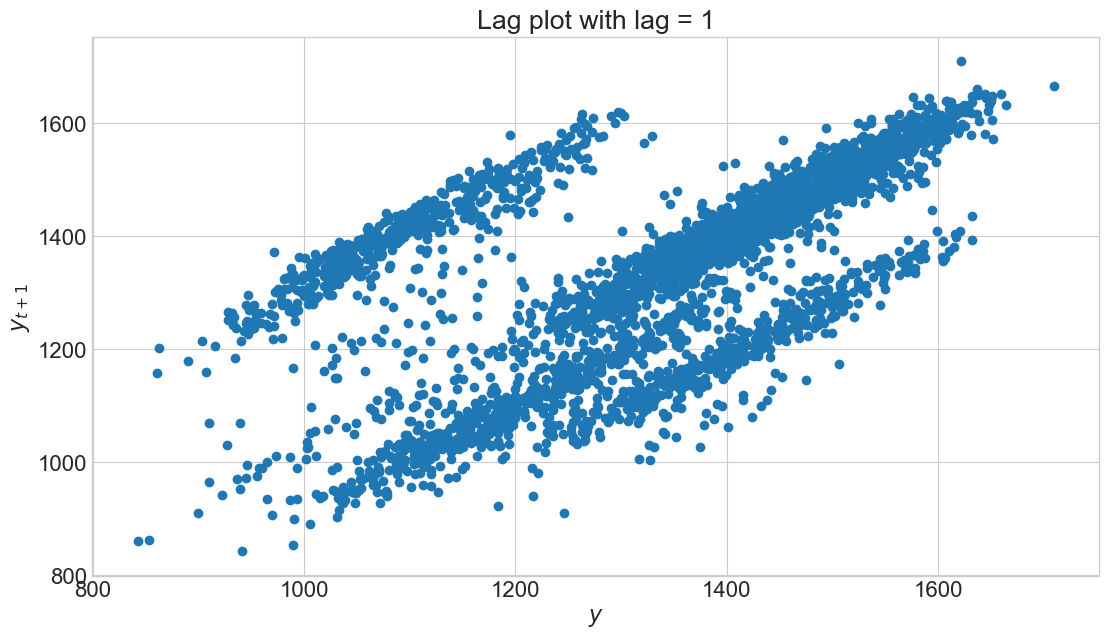

In [29]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')
plt.show()

## Treating $t$ as day

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

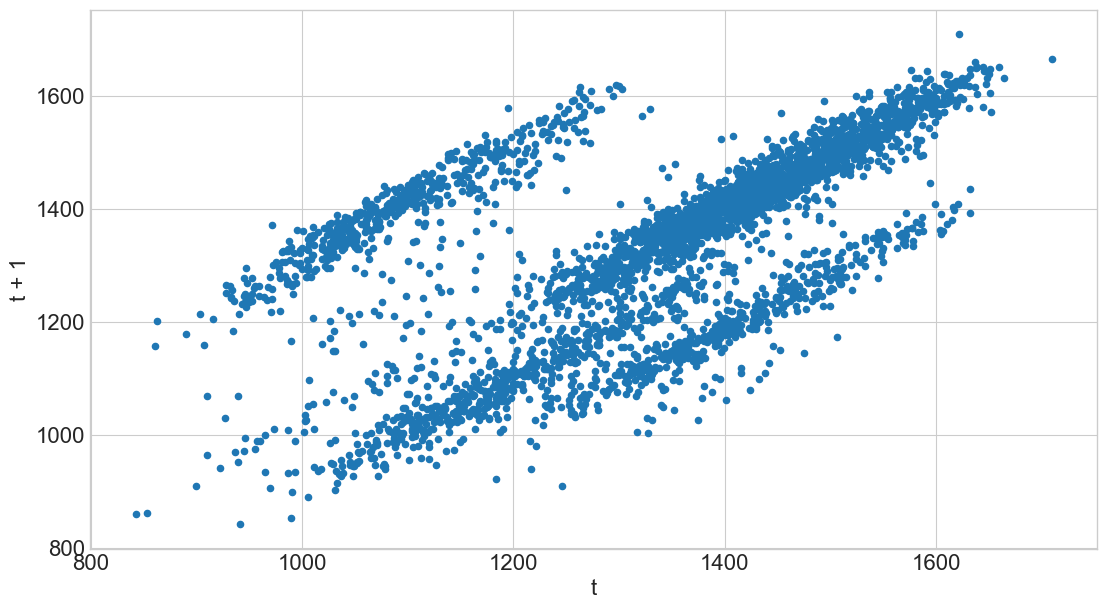

In [30]:
train['y(t + 1)'] = train.consumption.shift(-1)
ax = train.plot.scatter(x='consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [31]:
# deleted created column for lag plot 

del train['y(t + 1)']

## Now I'm going to perform the same operation, but with weekly data

,this_week,wind,solar,wind_solar,year,the_next_week
date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1501.403286
...,...,...,...,...,...,...
2015-12-06,1494.494429,472.525143,23.427000,495.952143,2015.0,1492.382000
2015-12-13,1492.382000,317.984857,30.106000,348.090857,2015.0,1440.003000
2015-12-20,1440.003000,258.151143,20.911286,279.062429,2015.0,1196.463286


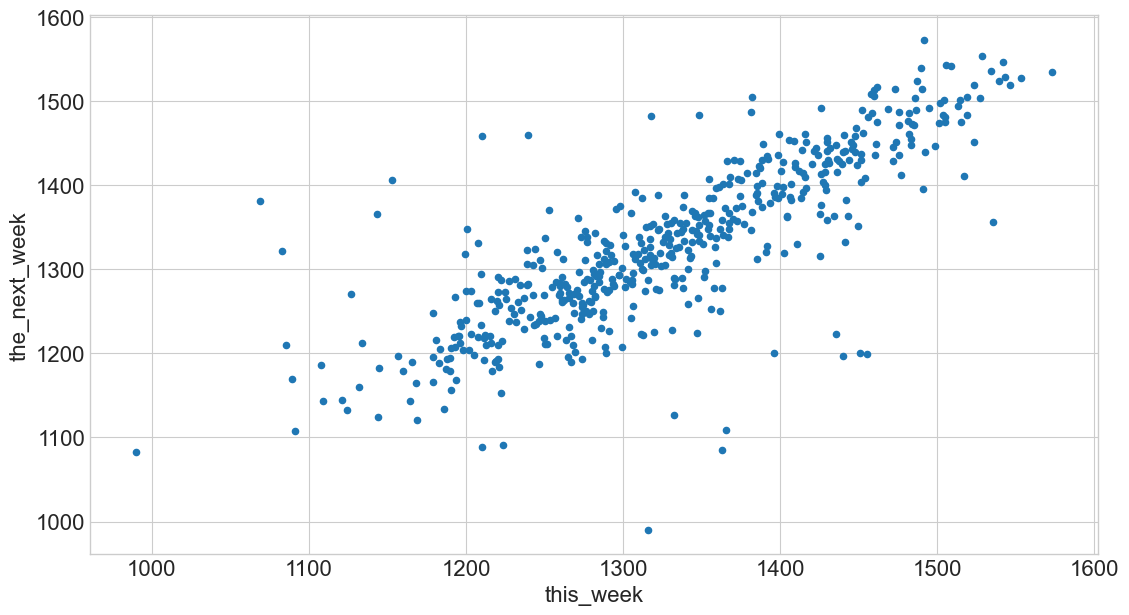

In [32]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.consumption.shift(-1)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

## A monthly visual does not look very promising when compared to mothly

,this_month,wind,solar,wind_solar,year,the_next_month
date,,,,,,
2006-01-31,1461.442065,0.000000,0.000000,0.000000,2006.0,1467.106893
2006-02-28,1467.106893,0.000000,0.000000,0.000000,2006.0,1418.649161
2006-03-31,1418.649161,0.000000,0.000000,0.000000,2006.0,1275.058900
2006-04-30,1275.058900,0.000000,0.000000,0.000000,2006.0,1253.488484
2006-05-31,1253.488484,0.000000,0.000000,0.000000,2006.0,1241.781667
...,...,...,...,...,...,...
2015-08-31,1292.465581,124.608097,148.792548,273.400645,2015.0,1363.728767
2015-09-30,1363.728767,184.561133,107.553100,292.114233,2015.0,1395.132194
2015-10-31,1395.132194,128.318032,62.778742,191.096774,2015.0,1452.687033


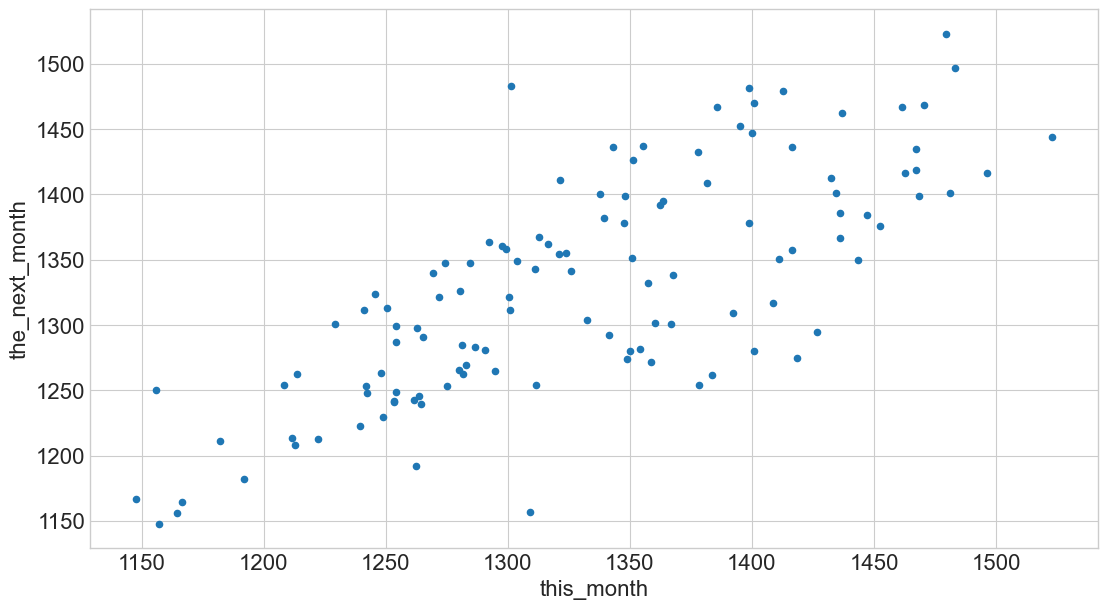

In [33]:
monthly = train.resample('M').mean()
monthly['the_next_month'] = monthly.consumption.shift(-1)
monthly = monthly.rename(columns={'consumption': 'this_month'})
monthly.plot.scatter(x='this_month', y='the_next_month')
monthly

## Now i'm going to shift by -12 to see how longer lag time makes a difference

,this_week,wind,solar,wind_solar,year,12_weeks_out
date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1376.688714
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1354.122000
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1347.883429
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1265.716143
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1231.136143
...,...,...,...,...,...,...
2015-12-06,1494.494429,472.525143,23.427000,495.952143,2015.0,NaN
2015-12-13,1492.382000,317.984857,30.106000,348.090857,2015.0,NaN
2015-12-20,1440.003000,258.151143,20.911286,279.062429,2015.0,NaN


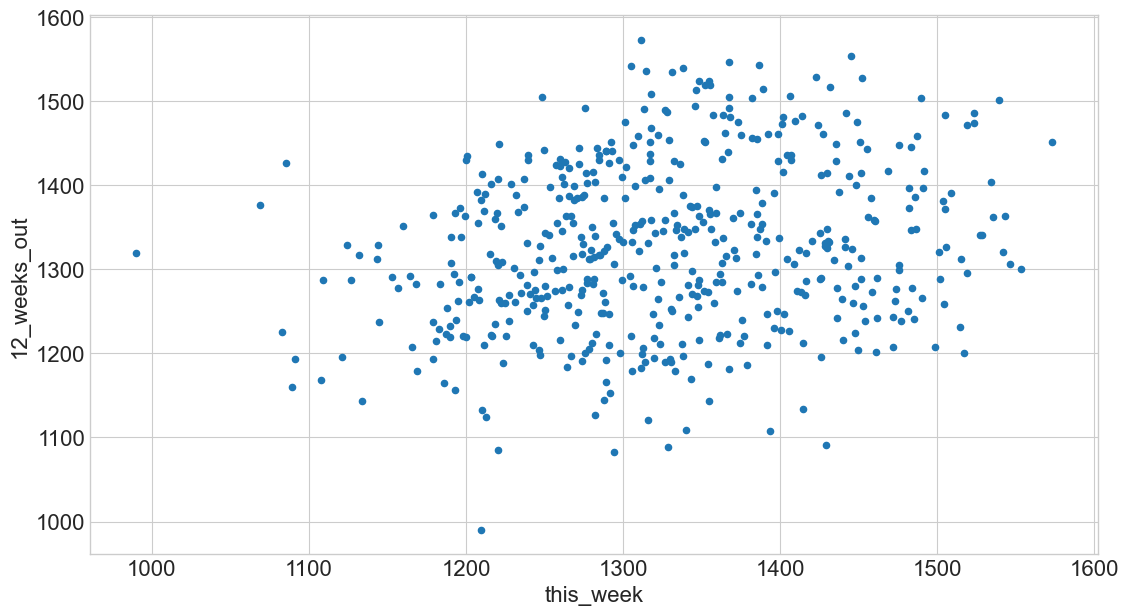

In [34]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.consumption.shift(-12)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

## Now i'm going to double the to see how even longer lag time makes a difference

,this_week,wind,solar,wind_solar,year,half_year_out
date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1220.539143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1273.592286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1254.896857
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1279.510571
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1260.945286
...,...,...,...,...,...,...
2015-12-06,1494.494429,472.525143,23.427000,495.952143,2015.0,NaN
2015-12-13,1492.382000,317.984857,30.106000,348.090857,2015.0,NaN
2015-12-20,1440.003000,258.151143,20.911286,279.062429,2015.0,NaN


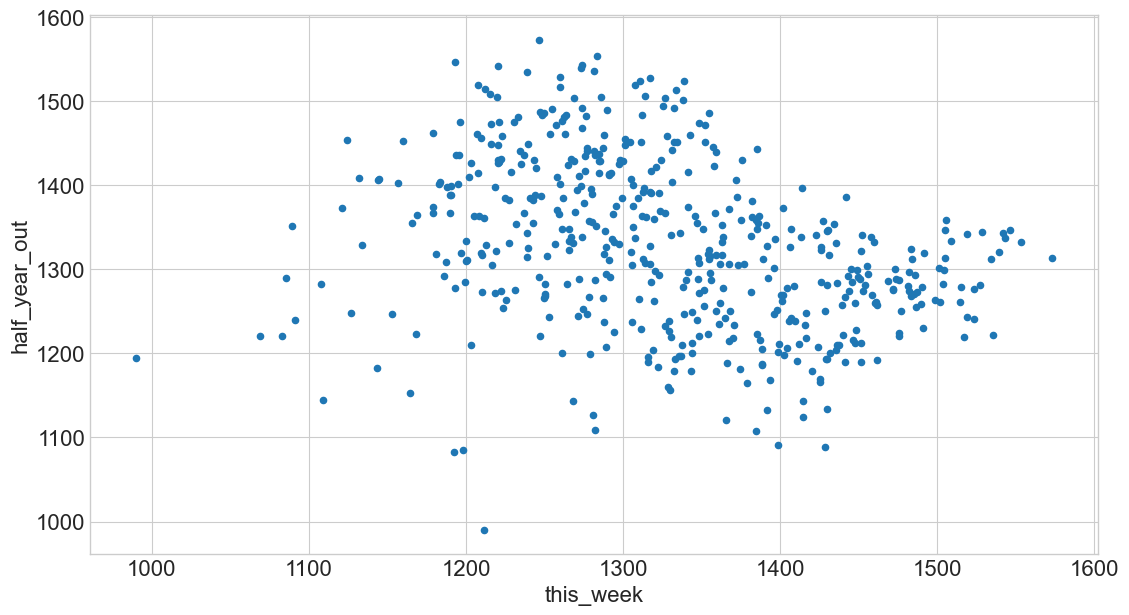

In [35]:
weekly = train.resample('W').mean()
weekly['half_year_out'] = weekly.consumption.shift(-24)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_year_out')
weekly

## A slight negative trend pattern with a 24 week lag plot

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

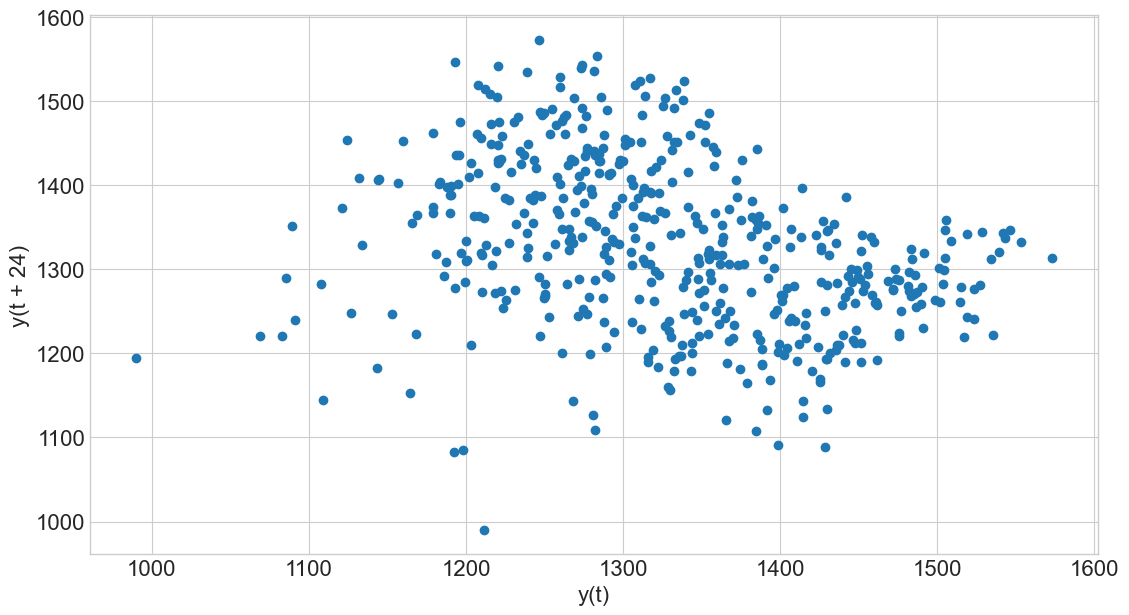

In [36]:
pd.plotting.lag_plot(train.consumption.resample('W').mean(), lag=24)

------------   

# Autocorrelation plot    

------------   

## consumption monthly average correlation-- seasonality

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

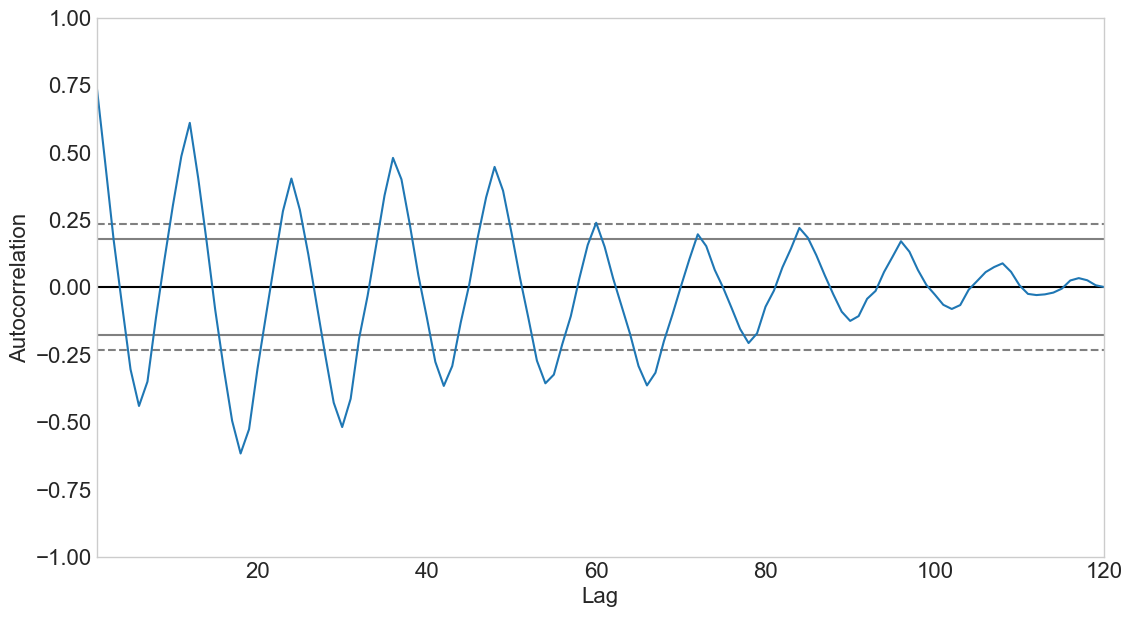

In [37]:
pd.plotting.autocorrelation_plot(train.consumption.resample('M').mean())

------------   

# Seasonal Decomposition

------------   

In [38]:
y = train.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
2006-01-01,1069.184000,NaN,-43.458036,NaN
2006-01-08,1381.300143,NaN,-147.058362,NaN
2006-01-15,1486.730286,NaN,-3.385190,NaN
2006-01-22,1490.031143,NaN,103.169142,NaN
2006-01-29,1514.176857,NaN,125.746777,NaN


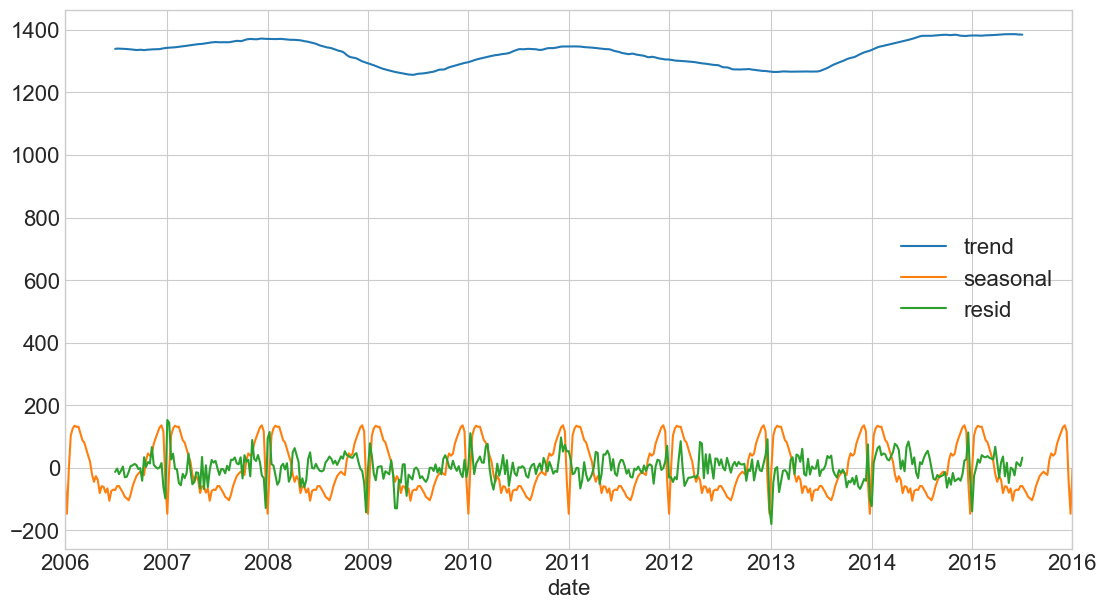

In [39]:
decomposition.iloc[:, 1:].plot()
plt.show()

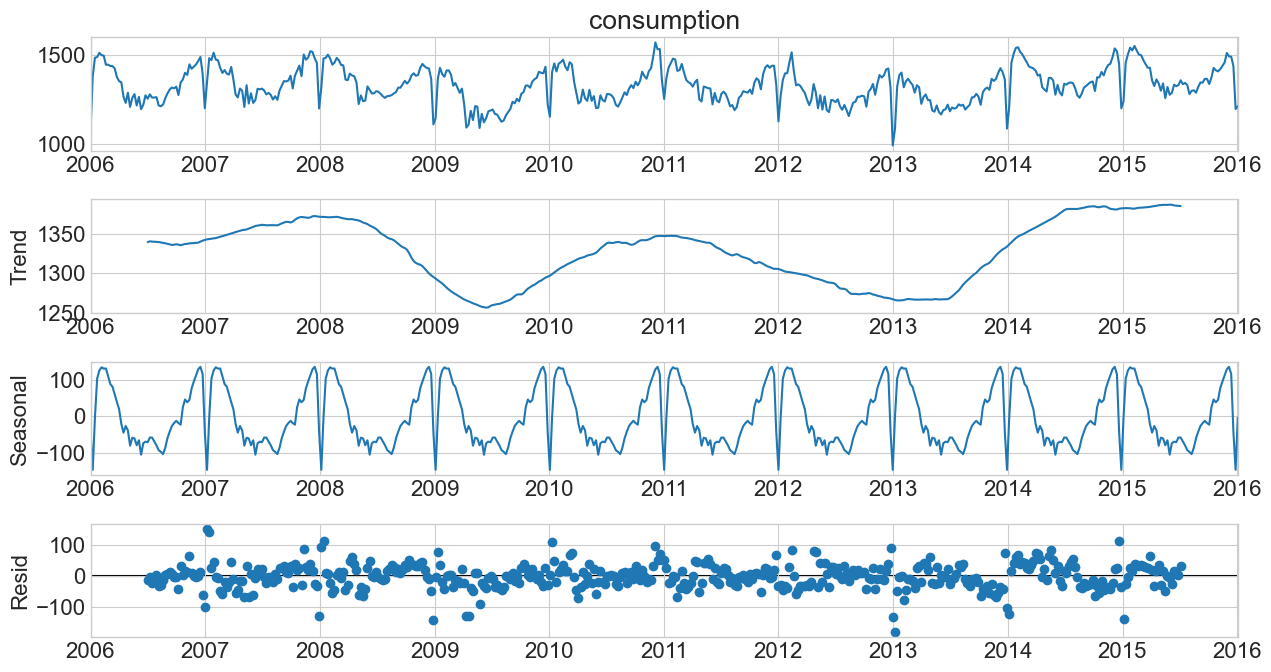

In [40]:
result.plot()
None

----

# Categories over time

In [41]:
# Resample the data to a daily frequency and calculate the mean for each column
train = train.resample('D').mean()

# Create a categorical feature called `consumption_bin` by dividing the `consumption` column into four quartiles
train['consumption_bin'] = pd.qcut(train.consumption, [0, 0.25, 0.50, 0.75, 1], labels=['Very Low', 'Low', 'Medium', 'High'])

# Group the data by the `consumption_bin` feature and calculate the mean for each column
train.groupby('consumption_bin').mean()

,consumption,wind,solar,wind_solar,year
consumption_bin,,,,,
Very Low,1095.821568,80.855257,38.503795,99.557196,2010.562979
Low,1297.296427,73.574651,38.198561,93.887269,2010.274918
Medium,1403.383114,79.070032,40.312272,96.962427,2010.649507
High,1523.052520,96.819768,19.735161,88.776104,2010.511501


## DO NOT PLOT HEAT MAPS PLOTS/BARS WITH CATEGORICAL FEATURES

# $strftime$

> ## If you wish to apply custom formatting to your axes, you should use plt.plot or ax.plot and pass the datetime index as your x values as opposed to using the built-in pandas plotting methods.

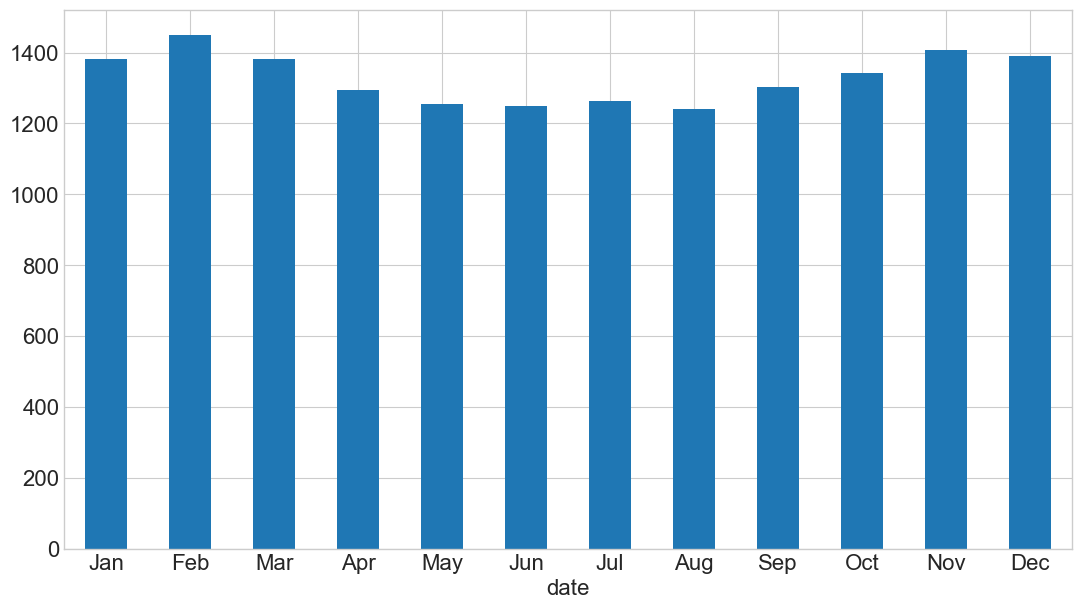

In [42]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

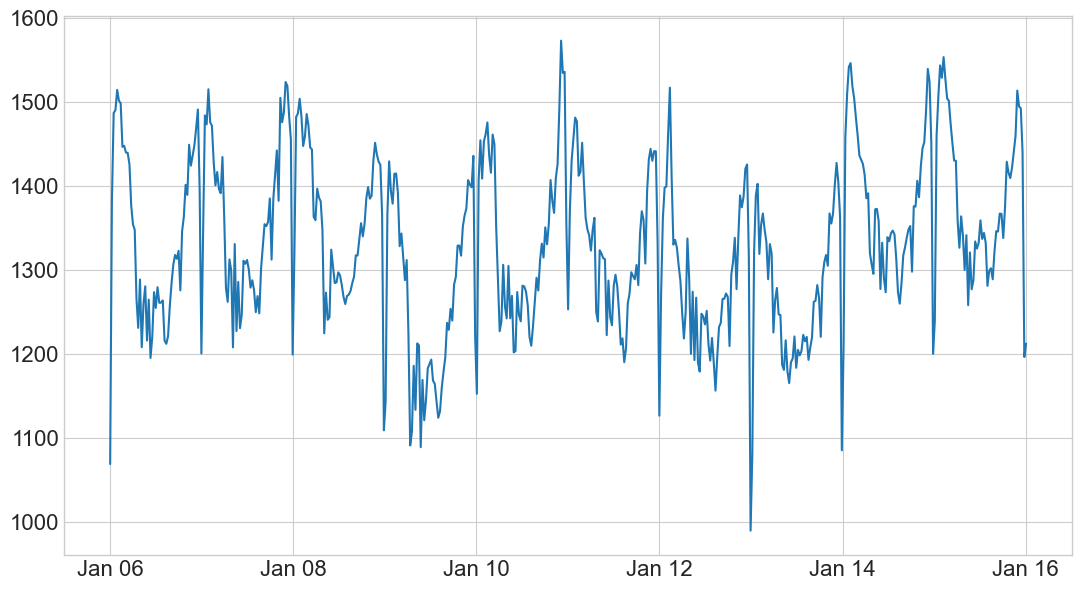

In [43]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

------------   

# Exploration on stores data (Instructor demo)   

In [44]:
%autosave 0

Autosave disabled


In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

Let's read in our clean dataset from the previous lesson.

In [46]:
df = pd.read_csv('stores.csv', index_col=0)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


As some of you have noticed, datetime objects will be read in as strings from csv files. Let's set our index as the proper datetime datatype.

In [47]:
df.index = pd.to_datetime(df.index)
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


Let's decide how to split our data into train/validate/test subsets before we begin exploration.

In [48]:
df.index.max(), df.index.min()

(Timestamp('2017-12-31 00:00:00'), Timestamp('2013-01-01 00:00:00'))

In [49]:
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

train.shape, validate.shape, test.shape

((547500, 11), (183000, 11), (182500, 11))

## Does store location affect total sales?

In [50]:
train.store_address.nunique()

10

In [51]:
store_sums = train.groupby('store_address').sale_amount.sum().sort_values(ascending=True)
store_sums 

store_address
12018 Perrin Beitel Rd     1852468
1520 Austin Hwy            2024724
1015 S WW White Rd         2025504
12125 Alamo Ranch Pkwy     2406336
516 S Flores St            2796994
735 SW Military Dr         2803588
8503 NW Military Hwy       2991622
2118 Fredericksburg Rdj    3030559
15000 San Pedro Ave        3267598
9255 FM 471 West           3414219
Name: sale_amount, dtype: int64

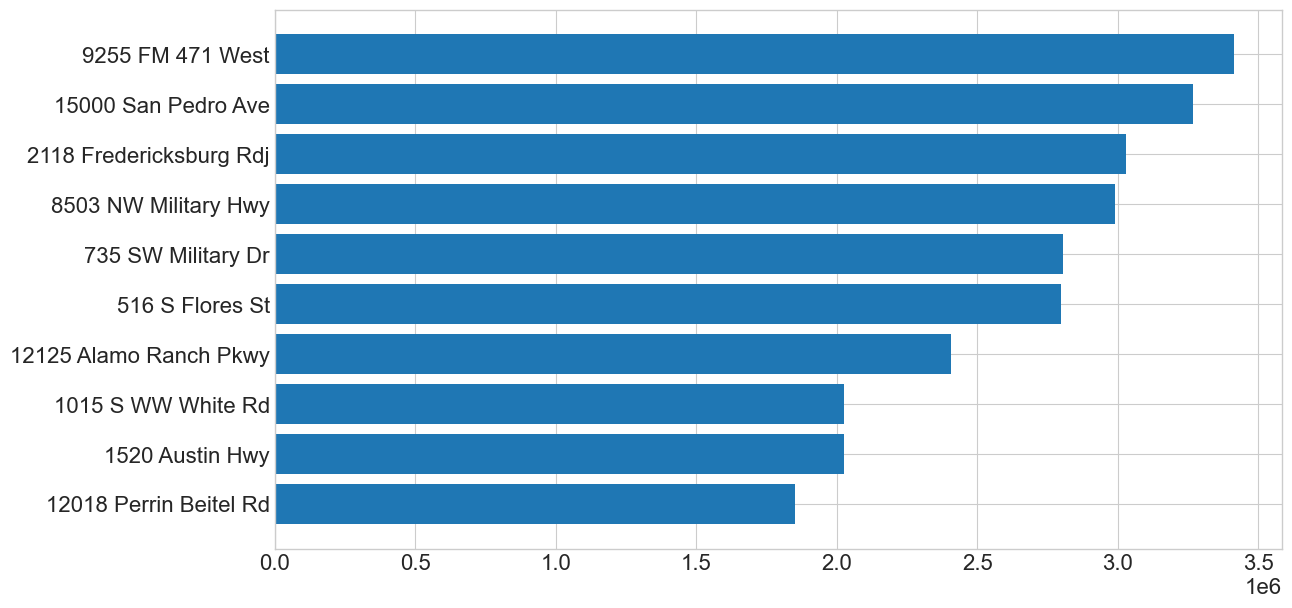

In [52]:
plt.barh(width=store_sums, y=store_sums.index)
plt.show()

### Yes, store location does affect total sales. Our top performing store is at 9255 FM 471 west.

### Do we have more total sales on certain days of the week?

In [53]:
day_sums = train.groupby('day_of_week').sales_total.sum().sort_values()
day_sums

day_of_week
Monday       16175493.46
Tuesday      18924016.28
Wednesday    18948380.83
Thursday     20284125.10
Friday       21540401.66
Saturday     22924358.67
Sunday       24292182.53
Name: sales_total, dtype: float64

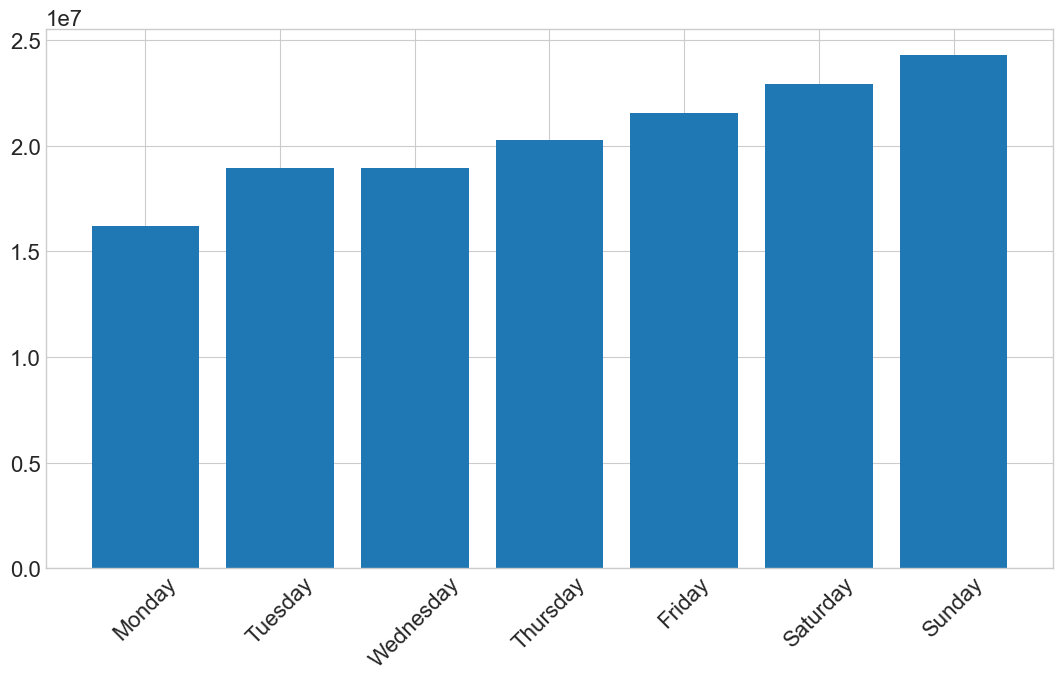

In [54]:
plt.bar(x=day_sums.index, height=day_sums)
plt.xticks(rotation=45)
plt.show()

### Yes, day of week affects total sales!. Friday, Saturday, and Sunday have the most total sales!

In [55]:
day_sample = train.resample('d').sales_total.sum()
day_sample.head()

sale_date
2013-01-01    73844.01
2013-01-02    73570.58
2013-01-03    78169.48
2013-01-04    84467.73
2013-01-05    87621.85
Freq: D, Name: sales_total, dtype: float64

<Axes: xlabel='sale_date'>

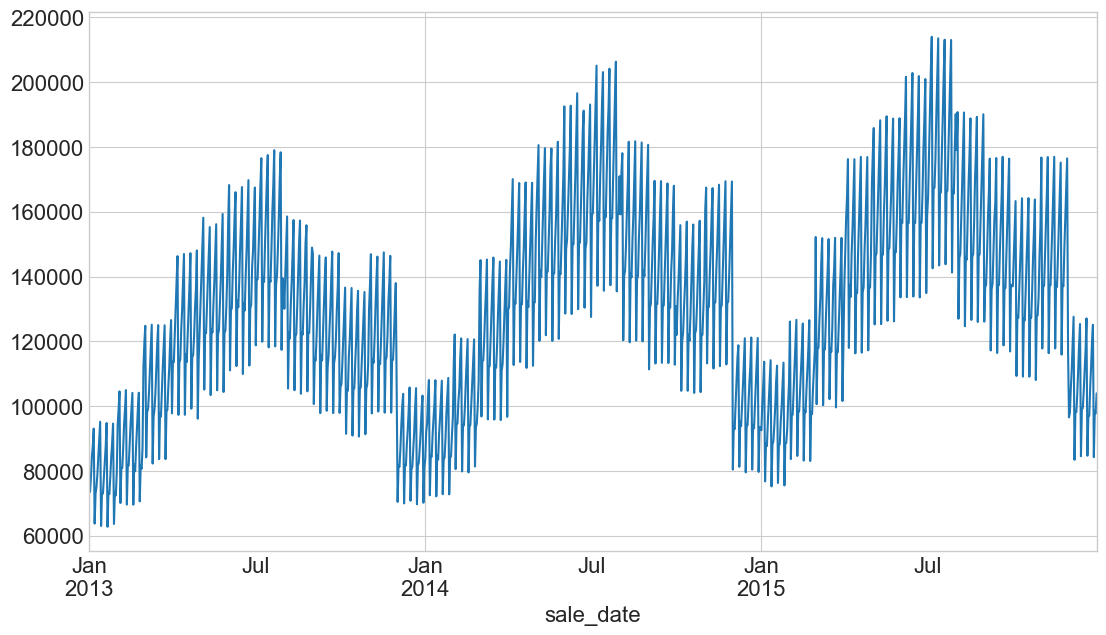

In [56]:
day_sample.plot()

In [57]:
#
month_sample = train.resample('M').sales_total.mean()
month_sample.head()

sale_date
2013-01-31    157.894723
2013-02-28    176.411855
2013-03-31    214.181650
2013-04-30    244.460082
2013-05-31    264.663123
Freq: M, Name: sales_total, dtype: float64

<Axes: xlabel='sale_date'>

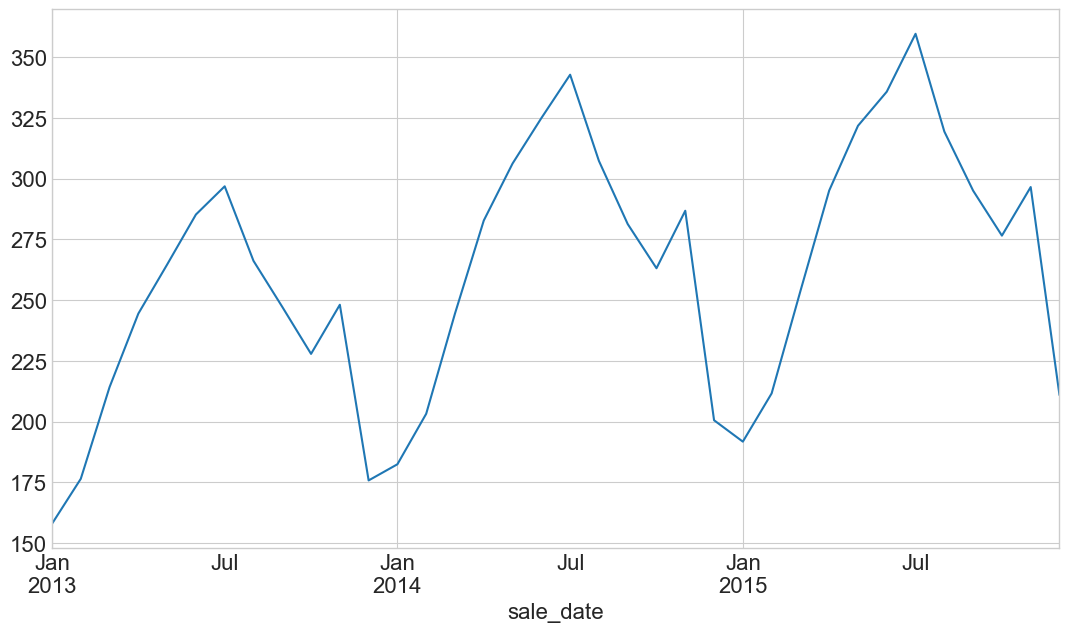

In [58]:
month_sample.plot()

In [59]:
day_sample.shift(-30)

sale_date
2013-01-01     79237.27
2013-01-02     94066.76
2013-01-03     98943.56
2013-01-04    104593.10
2013-01-05     70131.45
                ...    
2015-12-27          NaN
2015-12-28          NaN
2015-12-29          NaN
2015-12-30          NaN
2015-12-31          NaN
Freq: D, Name: sales_total, Length: 1095, dtype: float64

In [60]:
month_shift = pd.DataFrame({'now' : day_sample,
                            'one_month_out' : day_sample.shift(-30)})
month_shift.head()

,now,one_month_out
sale_date,,
2013-01-01,73844.01,79237.27
2013-01-02,73570.58,94066.76
2013-01-03,78169.48,98943.56
2013-01-04,84467.73,104593.10
2013-01-05,87621.85,70131.45


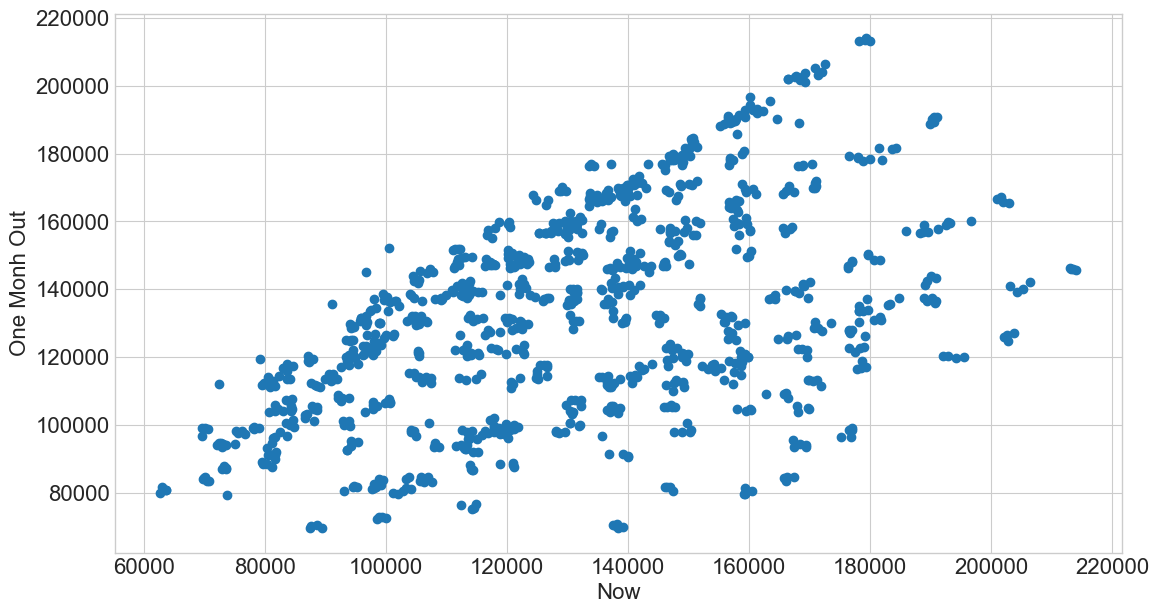

In [61]:
plt.scatter(x=month_shift.now, y=month_shift.one_month_out)
plt.xlabel('Now')
plt.ylabel('One Monh Out')
plt.show()

In [62]:
half_shift = pd.DataFrame({'now': day_sample,
                           'half_year_out': day_sample.shift(-182)})
half_shift.head()

,now,half_year_out
sale_date,,
2013-01-01,73844.01,139006.90
2013-01-02,73570.58,139195.12
2013-01-03,78169.48,148207.22
2013-01-04,84467.73,157551.04
2013-01-05,87621.85,167910.51


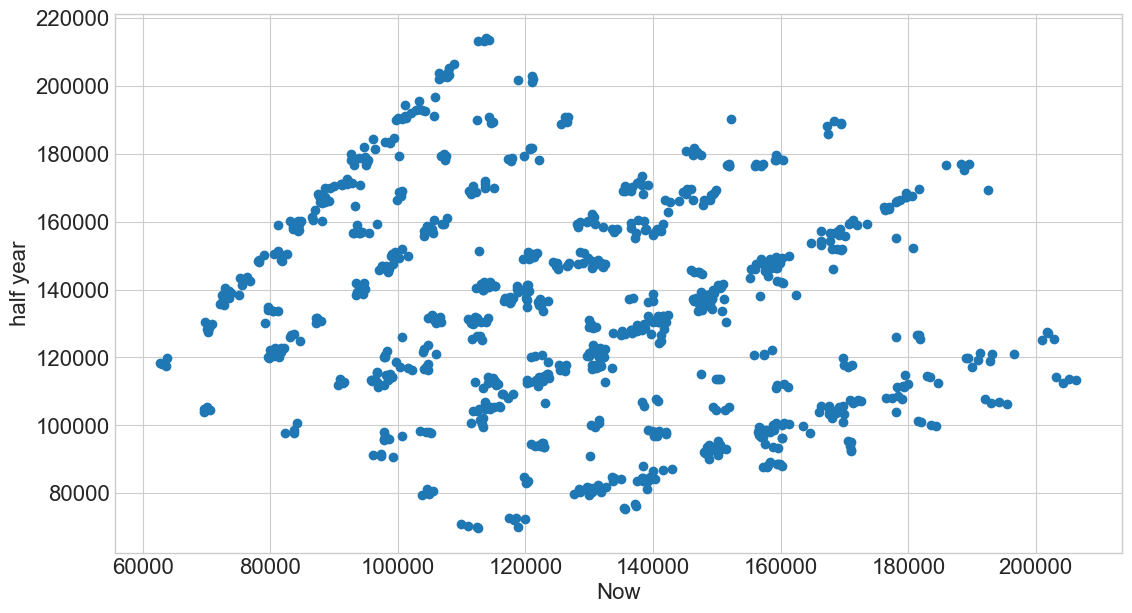

In [63]:
plt.scatter(x=half_shift.now, y=half_shift.half_year_out)
plt.xlabel('Now')
plt.ylabel('half year')
plt.show()

In [64]:
week_sample = train.resample('w').sales_total.sum()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

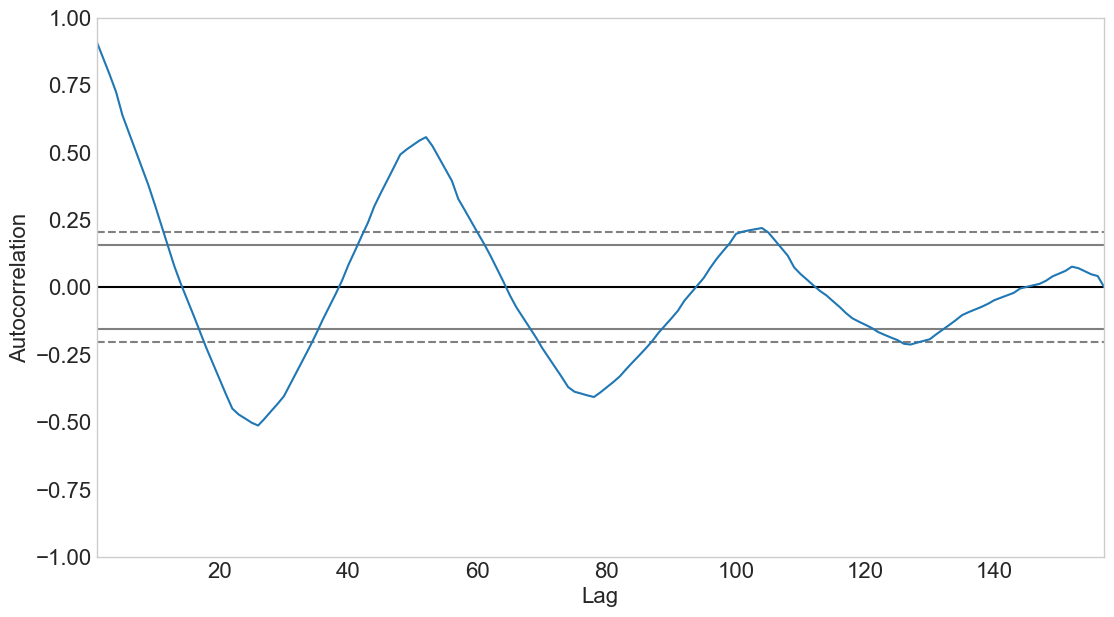

In [65]:
pd.plotting.autocorrelation_plot(week_sample)

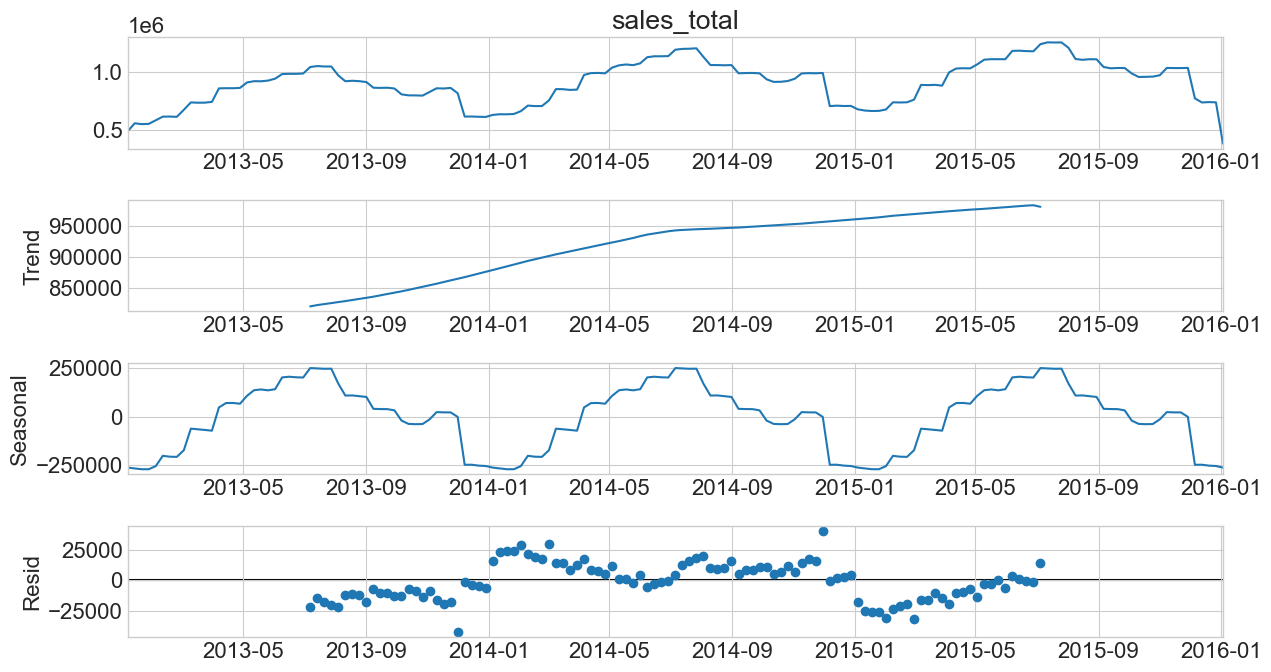

In [66]:
result = sm.tsa.seasonal_decompose(week_sample).plot()
result
None 